In [2]:
import pandas as pd
import glob

# Path ke folder yang berisi file CSV
folder_path = "D:\Documents\Tugas Akhir\Recommender System\Dataset\*.csv"

# Ambil semua file CSV dalam folder
csv_files = glob.glob(folder_path)

# List untuk menyimpan data dari setiap file
dataframes = []

# Loop untuk membaca setiap file CSV
for file in csv_files:
    print(f"Membaca file: {file}")
    df = pd.read_csv(file,  sep=';', encoding='ISO-8859-1')
    dataframes.append(df)


Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Acne_Cream.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\acne_pimple_patch.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Ampoule.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\booster.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Clay_Mask.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\cleansing_Balm.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Cleansing_Bar_Powder.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\cleansing_cream.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Cleansing_Gel.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Cleansing_Oil.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\cleansing_wipes.csv
Membaca file: D:\Documents\Tugas Akhir\Recommender System\Dataset\Essence.csv
M

In [3]:
df = dataframes[0] 
df.head()

,name,brand,price,ingredients,rating,sub-category,category,benefit
0,Biome Ultimate Indulging Cream,AXIS-Y,Rp229.000,"Water, Glycerin, Betaine, Methylpropanediol, C...",4.9,Acne Cream,Treatment,"meningkatkan elastisitas kulit, membuat kulit ..."
1,SOS Acne Gel,BLP BEAUTY,Rp39.500,"Water, Camellia Sinensis Leaf Extract, Butylen...",5.0,Acne Cream,Treatment,merawat jerawat secara efektif dan efisien tan...
2,Brightening Cream,FOCALSKIN,Rp120.320,"AQUA, BUTYLENE GLYCOL, HYDROGENATED POLYISOBUT...",0.0,Acne Cream,Treatment,"Mencerahkan wajah, Mengurangi kulit kusam, men..."
3,Licorice Advanced Peeling Gel,NPURE,Rp65.000,"Water, Glycerin, Cellulose, Dipropylene Glycol...",4.8,Acne Cream,Treatment,"membantu mencerahkan kulit yang kusam, mengang..."
4,Krim Penghilang Noda Bekas Jerawat Luka & Stre...,BREYLEE,Rp100.000,"Aqua, Glycerin, Centella Asiatica Extract, Arb...",4.5,Acne Cream,Treatment,"menyamarkan bekas jerawat, C-Section, dan luka..."


In [ ]:
for i, df in enumerate(dataframes):
    print(f"File ke-{i+1} memiliki kolom: {df.columns.tolist()}")


In [4]:
# Gabungkan semua data CSV menjadi satu DataFrame
skincare = pd.concat(dataframes, ignore_index=True)

# Cek hasilnya
skincare.head()


,name,brand,price,ingredients,rating,sub-category,category,benefit
0,Biome Ultimate Indulging Cream,AXIS-Y,Rp229.000,"Water, Glycerin, Betaine, Methylpropanediol, C...",4.9,Acne Cream,Treatment,"meningkatkan elastisitas kulit, membuat kulit ..."
1,SOS Acne Gel,BLP BEAUTY,Rp39.500,"Water, Camellia Sinensis Leaf Extract, Butylen...",5.0,Acne Cream,Treatment,merawat jerawat secara efektif dan efisien tan...
2,Brightening Cream,FOCALSKIN,Rp120.320,"AQUA, BUTYLENE GLYCOL, HYDROGENATED POLYISOBUT...",0.0,Acne Cream,Treatment,"Mencerahkan wajah, Mengurangi kulit kusam, men..."
3,Licorice Advanced Peeling Gel,NPURE,Rp65.000,"Water, Glycerin, Cellulose, Dipropylene Glycol...",4.8,Acne Cream,Treatment,"membantu mencerahkan kulit yang kusam, mengang..."
4,Krim Penghilang Noda Bekas Jerawat Luka & Stre...,BREYLEE,Rp100.000,"Aqua, Glycerin, Centella Asiatica Extract, Arb...",4.5,Acne Cream,Treatment,"menyamarkan bekas jerawat, C-Section, dan luka..."


In [5]:
skincare.shape

(2823, 8)

In [6]:
print(skincare.isna().sum())


name             0
brand            0
price            0
ingredients     13
rating           0
sub-category     0
category         0
benefit          1
dtype: int64


In [9]:
skincare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2823 non-null   object 
 1   brand         2823 non-null   object 
 2   price         2823 non-null   int64  
 3   ingredients   2810 non-null   object 
 4   rating        2823 non-null   float64
 5   sub-category  2823 non-null   object 
 6   category      2823 non-null   object 
 7   benefit       2822 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 176.6+ KB


In [5]:
import re

# Fungsi untuk mengubah hanya harga pertama dari rentang
def convert_currency(price):
    # Jika harga dalam rentang, ambil harga pertama sebelum '-'
    if ' - ' in price:
        price_first = price.split(' - ')[0]
    else:
        price_first = price  # Jika harga hanya satu (bukan rentang)
    
    # Menghapus karakter non-digit dan konversi ke angka
    price_first = re.sub(r'\D', '', price_first)
    return int(price_first)

# Terapkan fungsi ke kolom 'price'
skincare['price'] = skincare['price'].apply(convert_currency)

skincare.head()


,name,brand,price,ingredients,rating,sub-category,category,benefit
0,Biome Ultimate Indulging Cream,AXIS-Y,229000,"Water, Glycerin, Betaine, Methylpropanediol, C...",4.9,Acne Cream,Treatment,"meningkatkan elastisitas kulit, membuat kulit ..."
1,SOS Acne Gel,BLP BEAUTY,39500,"Water, Camellia Sinensis Leaf Extract, Butylen...",5.0,Acne Cream,Treatment,merawat jerawat secara efektif dan efisien tan...
2,Brightening Cream,FOCALSKIN,120320,"AQUA, BUTYLENE GLYCOL, HYDROGENATED POLYISOBUT...",0.0,Acne Cream,Treatment,"Mencerahkan wajah, Mengurangi kulit kusam, men..."
3,Licorice Advanced Peeling Gel,NPURE,65000,"Water, Glycerin, Cellulose, Dipropylene Glycol...",4.8,Acne Cream,Treatment,"membantu mencerahkan kulit yang kusam, mengang..."
4,Krim Penghilang Noda Bekas Jerawat Luka & Stre...,BREYLEE,100000,"Aqua, Glycerin, Centella Asiatica Extract, Arb...",4.5,Acne Cream,Treatment,"menyamarkan bekas jerawat, C-Section, dan luka..."


In [49]:
# Simpan gabungan data ke file baru
skincare.to_csv("D:\Documents\Tugas Akhir\Recommender System\skincare.csv", index=False)

### Statistika Deskriptif

C:\Users\Euis\AppData\Local\Temp\ipykernel_11012\2615571184.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_cat_count.index, y=sub_cat_count.values, palette='viridis')


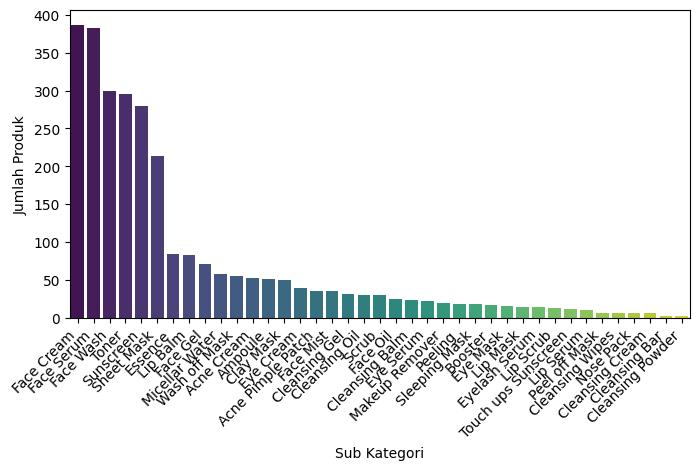

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah produk per sub kategori
sub_cat_count = skincare['sub-category'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=sub_cat_count.index, y=sub_cat_count.values, palette='viridis')
plt.xlabel('Sub Kategori')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45, ha='right')
plt.show()

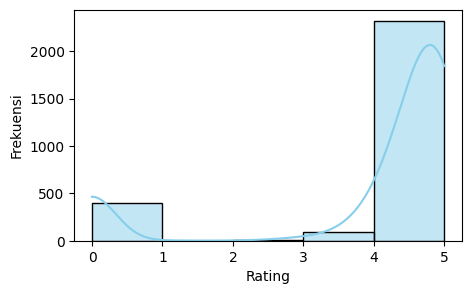

In [14]:
# Plot histogram rating
plt.figure(figsize=(5, 3))
sns.histplot(skincare['rating'], bins=5, kde=True, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

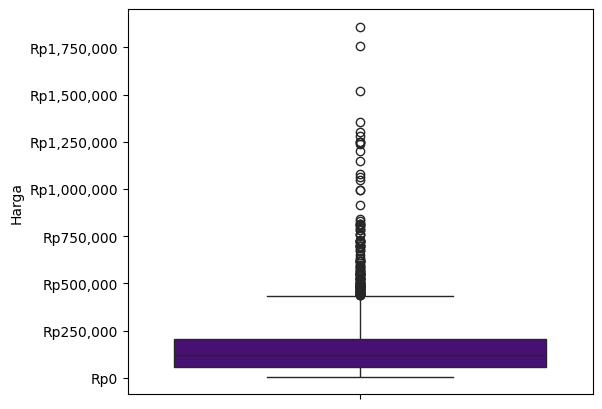

In [30]:
# Plot boxplot price
import matplotlib.ticker as mticker
plt.figure(figsize=(6, 5))
ax = sns.boxplot(y=skincare['price'], color='indigo')
plt.ylabel('Harga')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'Rp{x:,.0f}'))
plt.show()

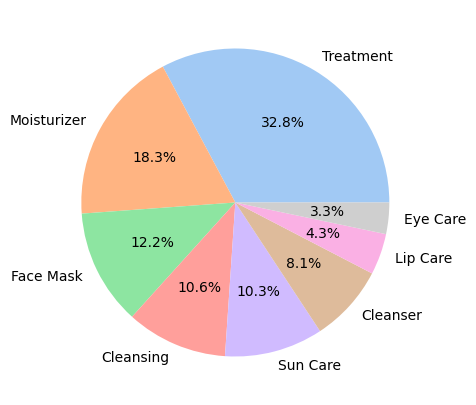

In [50]:
plt.figure(figsize=(6, 5))
category_counts = skincare['category'].value_counts()
category_percentages = category_counts / category_counts.sum() * 100

plt.pie(category_percentages, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.show()

In [16]:
!pip install wordcloud



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Data Preprocessing

In [1]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords dan wordnet jika belum ada
nltk.download('stopwords')
nltk.download('wordnet')

# Inisialisasi stopwords dan lemmatizer
stop_words = set(stopwords.words('indonesian'))  # Untuk Bahasa Indonesia
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Euis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Euis\AppData\Roaming\nltk_data...


In [8]:
skincare = skincare.dropna()


In [13]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import spacy
nlp = spacy.load('xx_ent_wiki_sm')  # Model multibahasa, jika tersedia model bahasa Indonesia, bisa gunakan itu

def preprocess_benefits(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Hapus karakter spesial
    words = text.split()  # Tokenisasi sederhana
    words = [word for word in words if word not in stop_words]  # Hapus stopwords
    doc = nlp(" ".join(words))
    words = [token.lemma_ for token in doc]  # Lemmatization using spaCy
    return " ".join(words)


# Terapkan preprocessing
skincare["clean_benefit"] = skincare["benefit"].apply(preprocess_benefits)

print(skincare[["benefit", "clean_benefit"]].head())

                                             benefit  \
0  meningkatkan elastisitas kulit, membuat kulit ...   
1  merawat jerawat secara efektif dan efisien tan...   
2  Mencerahkan wajah, Mengurangi kulit kusam, men...   
3  membantu mencerahkan kulit yang kusam, mengang...   
4  menyamarkan bekas jerawat, C-Section, dan luka...   

                              clean_benefit  
0                                            
1                                            
2                                            
3                                            
4                                            


In [11]:
#Tokenizing
df["ingredients"] = df["ingredients"].str.split(r", (?=[a-zA-Z])|/|\(")

skincare["ingredients"].head()

0    water, glycerin, betaine, methylpropanediol, c...
1    water, camellia sinensis leaf extract, butylen...
2    aqua, butylene glycol, hydrogenated polyisobut...
3    water, glycerin, cellulose, dipropylene glycol...
4    aqua, glycerin, centella asiatica extract, arb...
Name: ingredients, dtype: object

In [12]:
skincare["ingredients"] = skincare["ingredients"].fillna("")
skincare["ingredients"] = skincare["ingredients"].apply(lambda x: [re.sub(r"\d+%?", "", i).strip() for i in x])

In [1]:
pip install spacy


   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.2 MB 364.6 kB/s eta 0:00:33
   - -------------------------------------- 0.5/12.2 MB 364.6 kB/s eta 0:00:33
   - -------------------------------------- 0.5/12.2 MB 364.6 kB/s eta 0:00:33
   - -------------------------------------- 0.5/12.2 MB 364.6 kB/s eta 0:00:33
   - -------------------------------------- 0.5/12.2 MB 364.6 kB/s eta 0:00:33
   -- ------------------------------------- 0


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_ingredients(ingredients):
    # Gabungkan token yang ada dalam list menjadi string untuk spaCy
    text = " ".join(ingredients)
    
    # Proses lemmatization menggunakan spaCy
    doc = nlp(text)
    
    # Mengambil lemmatized word untuk setiap token dalam teks
    return [token.lemma_ for token in doc]

# Terapkan lemmatization pada kolom 'ingredients'
skincare["ingredients"] = skincare["ingredients"].apply(lemmatize_ingredients)

# Tampilkan hasil
print(skincare["ingredients"])


ModuleNotFoundError: No module named 'spacy'

In [ ]:
# 4. Hapus angka dan simbol persen (misalnya, "5%")
ingredients_list = [re.sub(r"\d+%?", "", ingredient).strip() for ingredient in ingredients_list]

# 5. Hapus kode warna kosmetik (CI XXXX)
ingredients_list = [ingredient for ingredient in ingredients_list if not re.match(r"ci \d+", ingredient)]

# 6. Standarisasi nama bahan (contoh mapping sederhana)
standardized_mapping = {
    "sodium hyaluronate": "hyaluronic acid",
    "niacinamide": "vitamin b3",
    "ethyl ascorbic acid": "vitamin c",
    "ascorbyl": "vitamin c"
}
ingredients_list = [standardized_mapping.get(ingredient, ingredient) for ingredient in ingredients_list]

# 7. Output hasil preprocessing
print(ingredients_list)